In [1]:
import networkx as nx

import json
import numpy as np
import matplotlib.pyplot as plt

from itertools import islice


In [2]:
INPUT_FILENAME = 'transactions_from_to.json'
FRACTION_WEIGHTS = 0.04

with open(INPUT_FILENAME, 'r') as fin:
    data = json.load(fin)

In [ ]:
# create graph 
g = nx.MultiDiGraph()

edge_weight = {}
for transaction in data:
    fromAddress = transaction['fromAddress']
    toAddress = transaction['toAddress']

    if fromAddress not in edge_weight:
        edge_weight[fromAddress] = {}
    if toAddress not in edge_weight[fromAddress]:
        edge_weight[fromAddress][toAddress] = 0
    edge_weight[fromAddress][toAddress] += 1

for fromAddress in edge_weight:
    for toAddress in edge_weight[fromAddress]:
        g.add_edge(fromAddress, toAddress, weight=edge_weight[fromAddress][toAddress])

In [9]:
print('no nodes: ' + str(len(nx.nodes(g))))
edges = nx.edges(g)
print('no edges: ' + str(len(edges)))

no nodes: 561
no edges: 840


In [5]:
# compute degrees
degrees = {}
for edge in edges:
    if edge[0] not in degrees:
        degrees[edge[0]] = 0
    degrees[edge[0]] += edge_weight[edge[0]][edge[1]]

    if edge[1] not in degrees:
        degrees[edge[1]] = 0
    degrees[edge[1]] += edge_weight[edge[0]][edge[1]]

# get top weights
weights = []
for edge in edges:
    weights.append(edge_weight[edge[0]][edge[1]])
top_weights = sorted(weights, reverse=True)[:int(len(weights) * FRACTION_WEIGHTS)]
print("top " + str(FRACTION_WEIGHTS * 100) + "% of weights: " + str(top_weights) )

top 4.0% of weights: [1001704, 965160, 918570, 902698, 658617, 571802, 547229, 489568, 413870, 365328, 346657, 339716, 274013, 245905, 202668, 197015, 189582, 182258, 176516, 155461, 70964, 69598, 43734, 43061, 27793, 27472, 14961, 14550, 8276, 7177, 2330, 1767, 1522]


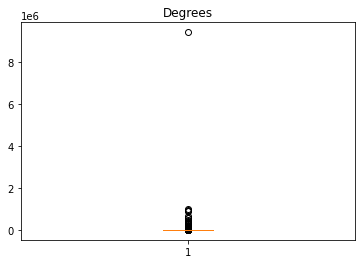

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Degrees')
ax1.boxplot(degrees.values())
plt.show()

In [7]:
symbol = 0
for edge in edges:
    if edge_weight[edge[0]][edge[1]] < top_weights[len(top_weights) - 1]:
        continue
    fromNode = 'NONE'
    if edge[0] is not None:
        #fromNode = edge[0][:5]# + ".." + entry['fromAddress'][-3:]
        fromNode = symbol
        symbol += 1
    toNode = 'NONE'
    if edge[1] is not None:
        #toNode = edge[1][:5]# + ".." + entry['toAddress'][-3:]
        toNode = symbol
        symbol += 1
    g_nice.add_edge(fromNode, toNode, weight=edge_weight[edge[0]][edge[1]])

# set edge weights 
edge_labels = {}
for edge in g_nice.edges():
    weight = g_nice.get_edge_data(edge[0], edge[1])
    if 0 in weight:
        weight = weight[0]['weight']
    edge_labels[(edge[0], edge[1])] = weight

NameError: name 'g_nice' is not defined

In [ ]:
# draw graph
pos = nx.spring_layout(g_nice, k=1/np.sqrt(len(g_nice.nodes())), iterations=20, weight=5)
nx.draw_networkx_edge_labels(g_nice, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)
nx.draw(g_nice, pos, node_color='lawngreen', with_labels = True, arrows = True)
plt.show()